# Synthetic magnetic data

This code calculates the total-field anomaly produced by a synthetic body. The synthetic data are calculated by using the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/).

### Import the required stuff

In [1]:
# Set PySide compatible APIs
import sip
sip.setapi('QString', 2)
sip.setapi('QVariant', 2)

In [2]:
#comment this command if you want to create a new model
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from IPython.display import Image as img
from fatiando import mesher, gridder
from fatiando.gravmag import polyprism
from fatiando.utils import ang2vec
from fatiando.vis import mpl, myv

### Create a synthetic body

The synthetic body is formed by four [polygonal prisms](http://www.fatiando.org/api/mesher.html#fatiando.mesher.PolygonalPrism). These prisms are vertically juxtaposed, the top of the shallowest prism is at 100 m, the bottom of the deepest prism is at 2100 m and the total magnetization of all prisms has intensity 10 A/m, inclination 13$^{\circ}$, and declination -27$^{\circ}$. The local-geomagnetic field is constant and has inclination 5$^{\circ}$ and declination 38$^{\circ}$. The x, y, and z axes of the Cartesian coordinate system point, respectively, to North, East and to depth.

In [4]:
#set a constant local-geomagnetic field
inc, dec = 5., 38. #in degrees

In [5]:
bounds = [-10000, 10000, -10000, 10000, 0, 5000]
area = bounds[:4]
depths = [100, 600, 1100, 1600, 2100]

In [6]:
#change this cell from `Raw NBConvert` to `Code` if you want to load a model
#by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
with open('model.pickle') as f:
        model = pickle.load(f)

### Calculate the total-field anomaly

The synthetic total-field anomaly is calculated at a constant z<sub>0</sub> = -100 m, on a regular grid of 141 $\times$ 80 points along, respectively, the x and y axes of the Cartesian coordinate system.

In [7]:
# grid of points (xp, yp, zp) on which the total-field anomaly is calculated
shape = (141, 80)
z0 = -100
xp, yp, zp = gridder.regular(area, shape, z=z0)

dx, dy = gridder.spacing(area, shape)

# total-field anomaly (in nT)
tf = polyprism.tf(xp, yp, zp, model, inc, dec)

In [8]:
print 'dx = %.5f \ndy = %.5f' % (dx, dy) 

dx = 142.85714 
dy = 253.16456


In [9]:
#Save the synthetic total-field anomaly in a txt file
header = """# Noise-free total-field anomaly calculated at z = {z} m, 
#on a regular grid of points
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# spacing (dx, dy): {spacing}
# x (m)    y (m)    z (m)    total-field anomaly (nT)
""".format(z=z0, shape=shape, area=area, spacing=(dx, dy))
file_name = 'tfanomaly_anomaly.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xp, yp, zp, tf), fmt='%.5f')

In [10]:
#Save the synthetic total-field anomaly in a txt file
profile = (xp == 0.)
header = """# Noise-free total-field anomaly calculated at z = {z} m, 
#on the profile x = 0 m
# x (m)    y (m)    z (m)    total-field anomaly (nT)
""".format(z=z0)
file_name = 'tfanomaly_profile.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xp[profile], yp[profile], zp[profile], tf[profile]), fmt='%.5f')

### Calculate the horizontal derivative of the total-field anomaly along the y-axis

The derivative is calculated numerically by using a central-difference approximation.

In [11]:
# total-field anomaly (in nT)
dytf = (polyprism.tf(xp, yp+10., zp, model, inc, dec) - \
        polyprism.tf(xp, yp-10., zp, model, inc, dec))/20.

In [12]:
#Save the derivative of the synthetic total-field anomaly in a txt file
header = """# Noise-free derivative of the total-field anomaly calculated at z = {z} m, 
#on a regular grid of points
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# spacing (dx, dy): {spacing}
# x (m)    y (m)    z (m)    deriv. total-field anomaly (nT/m)
""".format(z=z0, shape=shape, area=area, spacing=(dx, dy))
file_name = 'dytfanomaly_anomaly.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xp, yp, zp, dytf), fmt='%.5f')

In [13]:
#Save the derivative of the synthetic total-field anomaly in a txt file
profile = (xp == 0.)
header = """# Noise-free derivative of the total-field anomaly calculated at z = {z} m, 
#on the profile x = 0 m
# x (m)    y (m)    z (m)    total-field anomaly (nT/m)
""".format(z=z0)
file_name = 'dytfanomaly_profile.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xp[profile], yp[profile], zp[profile], dytf[profile]), fmt='%.5f')

### Plot the synthetic data

Anomaly map

/home/vanderlei/anaconda3/envs/fatiando2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'picker'
  s)


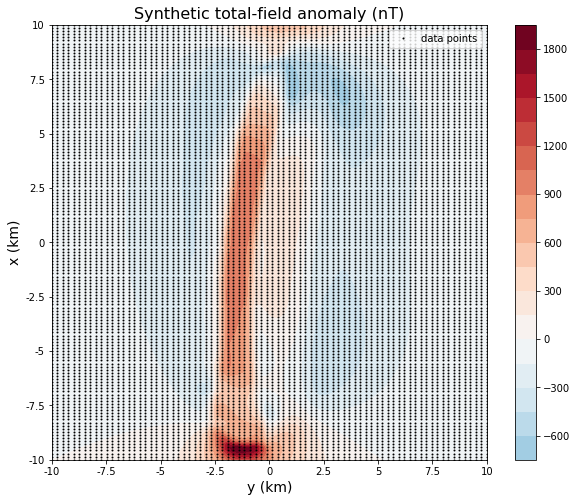

In [18]:
ranges = np.max(np.abs([np.min(tf), np.max(tf)]))
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.title("Synthetic total-field anomaly (nT)", fontsize=16)
mpl.contourf(yp, xp, tf, shape, 20, cmap=plt.get_cmap('RdBu_r'),
            vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.plot(yp, xp, '.k', markersize=2, label='data points')
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)
mpl.set_area(area)
plt.legend(loc='upper right')
mpl.m2km()
plt.savefig('map.png')
plt.show()

Profile at x = 0 m

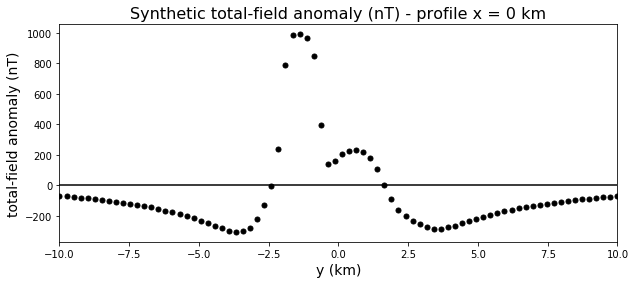

In [19]:
plt.figure(figsize=(10,4))
plt.title("Synthetic total-field anomaly (nT) - profile x = 0 km", fontsize=16)
plt.plot(area[2:4], [0., 0.], '-k')
plt.plot(0.001*yp[profile], tf[profile], '.k', markersize=10)
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('total-field anomaly (nT)', fontsize=14)
plt.xlim(0.001*area[2], 0.001*area[3])
plt.savefig('profile.png')
plt.show()

Derivative of the total-field anomaly along y

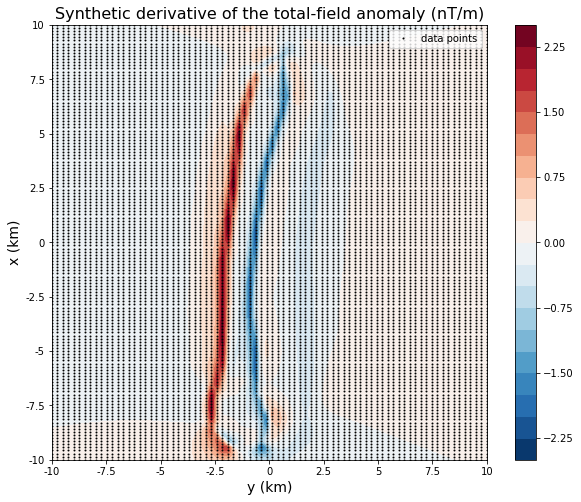

In [20]:
ranges = np.max(np.abs([np.min(dytf), np.max(dytf)]))
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.title("Synthetic derivative of the total-field anomaly (nT/m)", fontsize=16)
mpl.contourf(yp, xp, dytf, shape, 20, cmap=plt.get_cmap('RdBu_r'),
            vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.plot(yp, xp, '.k', markersize=2, label='data points')
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)
mpl.set_area(area)
plt.legend(loc='upper right')
mpl.m2km()
plt.savefig('map_dy.png')
plt.show()

Profile of the derivative at x = 0 m

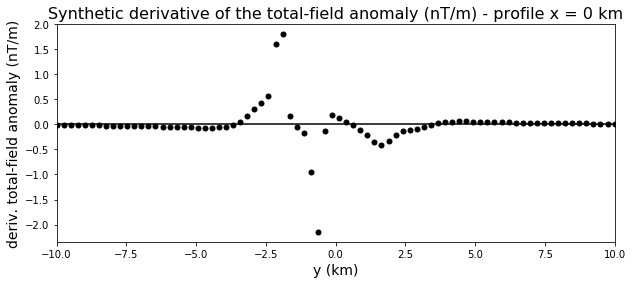

In [21]:
plt.figure(figsize=(10,4))
plt.title("Synthetic derivative of the total-field anomaly (nT/m) - profile x = 0 km", fontsize=16)
plt.plot(area[2:4], [0., 0.], '-k')
plt.plot(0.001*yp[profile], dytf[profile], '.k', markersize=10)
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('deriv. total-field anomaly (nT/m)', fontsize=14)
plt.xlim(0.001*area[2], 0.001*area[3])
plt.savefig('profile_dy.png')
plt.show()

### Plot the synthetic body

In [22]:
# Show the model
scene=myv.figure(size=(600,500))
myv.polyprisms(model, 'magnetization')
myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])

scene.scene.camera.position = [-45893.530845938621, -15145.201752891464, -25039.48539632967]
scene.scene.camera.focal_point = [-444.56066945604118, -2065.8995815899721, 1099.9999999999832]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.48341530978694358, 0.064881785059688557, -0.87298338599944825]
scene.scene.camera.clipping_range = [31071.114118358404, 86583.208366893625]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.savefig('model.png')
myv.show()

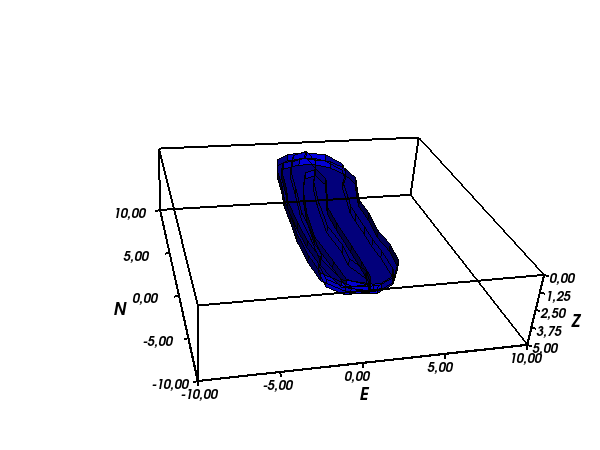

In [23]:
img('model.png')

In [24]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift, rfft, irfft

In [25]:
TF_profile = fft(tf[profile]) # Scipy

In [26]:
f = fftfreq(shape[1], dy)

In [27]:
DYTF_profile = 1.j*2.*np.pi*f*TF_profile

In [30]:
dytf_profile_fft = ifft(DYTF_profile).real

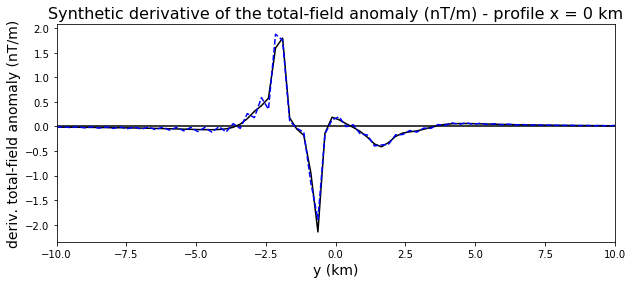

In [31]:
plt.figure(figsize=(10,4))
plt.title("Synthetic derivative of the total-field anomaly (nT/m) - profile x = 0 km", fontsize=16)
plt.plot(area[2:4], [0., 0.], '-k')
plt.plot(0.001*yp[profile], dytf[profile], '-k', markersize=10, label='True')
plt.plot(0.001*yp[profile], dytf_profile_fft, '--b', markersize=10, label='Calculated')
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('deriv. total-field anomaly (nT/m)', fontsize=14)
plt.xlim(0.001*area[2], 0.001*area[3])
plt.show()